In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from castle.algorithms import PC, Notears, DAG_GNN
import networkx as nx
import torch
import seaborn as sns
from scipy.sparse import csr_matrix

2024-10-27 08:48:59,279 - /home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/castle/backend/__init__.py[line:36] - INFO: You can use `os.environ['CASTLE_BACKEND'] = backend` to set the backend(`pytorch` or `mindspore`).
2024-10-27 08:48:59,351 - /home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/castle/algorithms/__init__.py[line:36] - INFO: You are using ``pytorch`` as the backend.


In [2]:
low = pd.read_csv('/teamspace/studios/this_studio/dataset/low_scrap.csv')
high = pd.read_csv('/teamspace/studios/this_studio/dataset/high_scrap.csv')

In [3]:
low.head()

,Station1_mp_0,Station1_mp_1,Station1_mp_2,Station1_mp_3,Station1_mp_4,Station1_mp_5,Station2_mp_6,Station2_mp_7,Station2_mp_8,Station2_mp_9,...,Station5_mp_88,Station5_mp_89,Station5_mp_90,Station5_mp_91,Station5_mp_92,Station5_mp_93,Station5_mp_94,Station5_mp_95,Station5_mp_96,Station5_mp_97
0,0.000164,10.0,2.0,0.000224,15.0,3.0,37577.464524,0.003730,55728.48,38647.52,...,4.610773e+06,0.004900,11161.72,5580.859,0.005311,378.1243,0.000600,5482.792737,4.217334e+06,0.004869
1,0.000240,8.0,2.0,0.000219,17.0,4.0,38731.386253,0.003738,56068.79,38993.59,...,4.308434e+06,0.004918,11161.72,6042.939,0.005281,393.5057,0.000627,5095.717933,4.039557e+06,0.004842
2,0.000160,11.0,3.0,0.000189,14.0,4.0,39404.300798,0.003647,56295.66,39024.36,...,4.320958e+06,0.004795,10838.07,6490.280,0.005289,390.3012,0.000576,4195.970586,4.177828e+06,0.004766
3,0.000173,9.0,3.0,0.000219,17.0,4.0,37393.410715,0.003700,54588.34,37205.51,...,4.625802e+06,0.004947,11013.67,5999.359,0.005361,389.0194,0.000551,4962.535809,4.194777e+06,0.004873
4,0.000212,9.0,2.0,0.000205,13.0,4.0,39265.722068,0.003616,55140.14,37751.55,...,4.569075e+06,0.004930,11148.90,5907.712,0.005314,351.2070,0.000574,5205.339077,4.015814e+06,0.004855


In [4]:
high.head()

,Station1_mp_0,Station1_mp_1,Station1_mp_2,Station1_mp_3,Station1_mp_4,Station1_mp_5,Station2_mp_6,Station2_mp_7,Station2_mp_8,Station2_mp_9,...,Station5_mp_88,Station5_mp_89,Station5_mp_90,Station5_mp_91,Station5_mp_92,Station5_mp_93,Station5_mp_94,Station5_mp_95,Station5_mp_96,Station5_mp_97
0,0.000190,7.0,2.0,0.000242,14.0,5.0,40647.414812,0.003704,55426.62,38097.63,...,4.505663e+06,0.004916,11139.29,6312.113,0.005396,379.4061,0.000555,4844.358156,4.061648e+06,0.004840
1,0.000182,10.0,2.0,0.000166,13.0,5.0,37508.035624,0.003632,55988.04,38620.59,...,3.992388e+06,0.004541,11191.84,5899.380,0.005342,396.0692,0.000551,5294.613653,4.058616e+06,0.004928
2,0.000152,6.0,2.0,0.000235,13.0,4.0,35544.185038,0.003626,57232.01,40003.00,...,4.017937e+06,0.004914,11280.28,5529.588,0.005371,387.7377,0.000650,5933.540338,5.078599e+06,0.004887
3,0.000185,8.0,3.0,0.000238,16.0,6.0,36826.252575,0.003663,56745.57,39628.07,...,5.166438e+06,0.004945,11302.71,5493.698,0.005391,371.0746,0.000580,5757.404641,5.003013e+06,0.004914
4,0.000169,8.0,2.0,0.000210,16.0,5.0,41817.937611,0.003610,58600.95,41239.27,...,4.721392e+06,0.004715,11046.36,6004.486,0.005373,376.8426,0.000555,5126.268814,4.241679e+06,0.004914


In [5]:
# Combine the datasets for causal analysis

# low["defect"] = 0  # Label low scrap as 0s
# high["defect"] = 1  # Label low scrap as 1

data = pd.concat([low, high])
data

,Station1_mp_0,Station1_mp_1,Station1_mp_2,Station1_mp_3,Station1_mp_4,Station1_mp_5,Station2_mp_6,Station2_mp_7,Station2_mp_8,Station2_mp_9,...,Station5_mp_88,Station5_mp_89,Station5_mp_90,Station5_mp_91,Station5_mp_92,Station5_mp_93,Station5_mp_94,Station5_mp_95,Station5_mp_96,Station5_mp_97
0,0.000164,10.0,2.0,0.000224,15.0,3.0,37577.464524,0.003730,55728.48,38647.52,...,4.610773e+06,0.004900,11161.72,5580.859,0.005311,378.1243,0.000600,5482.792737,4.217334e+06,0.004869
1,0.000240,8.0,2.0,0.000219,17.0,4.0,38731.386253,0.003738,56068.79,38993.59,...,4.308434e+06,0.004918,11161.72,6042.939,0.005281,393.5057,0.000627,5095.717933,4.039557e+06,0.004842
2,0.000160,11.0,3.0,0.000189,14.0,4.0,39404.300798,0.003647,56295.66,39024.36,...,4.320958e+06,0.004795,10838.07,6490.280,0.005289,390.3012,0.000576,4195.970586,4.177828e+06,0.004766
3,0.000173,9.0,3.0,0.000219,17.0,4.0,37393.410715,0.003700,54588.34,37205.51,...,4.625802e+06,0.004947,11013.67,5999.359,0.005361,389.0194,0.000551,4962.535809,4.194777e+06,0.004873
4,0.000212,9.0,2.0,0.000205,13.0,4.0,39265.722068,0.003616,55140.14,37751.55,...,4.569075e+06,0.004930,11148.90,5907.712,0.005314,351.2070,0.000574,5205.339077,4.015814e+06,0.004855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,0.000192,9.0,2.0,0.000191,17.0,4.0,36978.079747,0.003614,57555.01,40074.13,...,4.171952e+06,0.004855,11150.18,5434.736,0.005389,388.3785,0.000600,5717.655904,4.063428e+06,0.004826
2496,0.000233,10.0,2.0,0.000202,12.0,4.0,36876.816011,0.003654,58493.27,41112.37,...,4.726517e+06,0.004887,11219.40,5958.983,0.005166,394.1465,0.000797,5288.176644,4.415160e+06,0.004650
2497,0.000147,8.0,3.0,0.000203,14.0,4.0,38685.399380,0.003664,55770.78,38576.38,...,4.472888e+06,0.004887,11178.38,6185.858,0.005400,385.8150,0.000574,4957.477832,4.653393e+06,0.004945
2498,0.000148,9.0,3.0,0.000246,17.0,5.0,37528.055062,0.003636,54790.22,37786.16,...,4.334952e+06,0.004885,11006.62,6251.229,0.005373,392.8648,0.000531,4916.920534,4.470916e+06,0.004916


<Axes: >

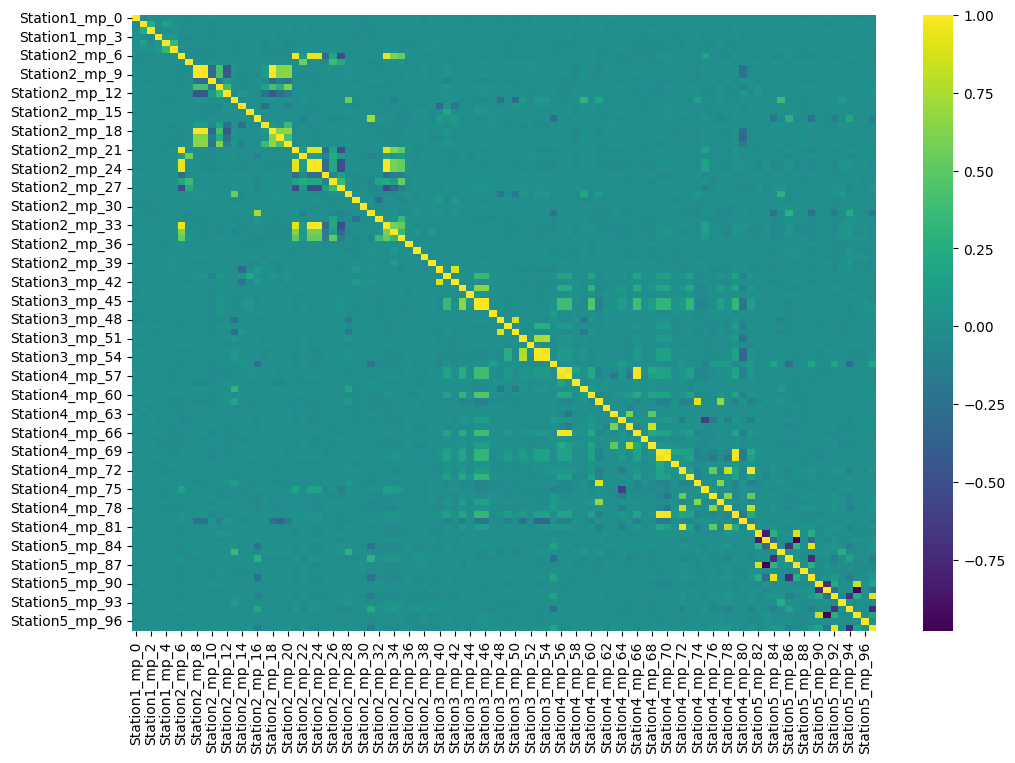

In [6]:
_ = plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap="viridis")

<Axes: >

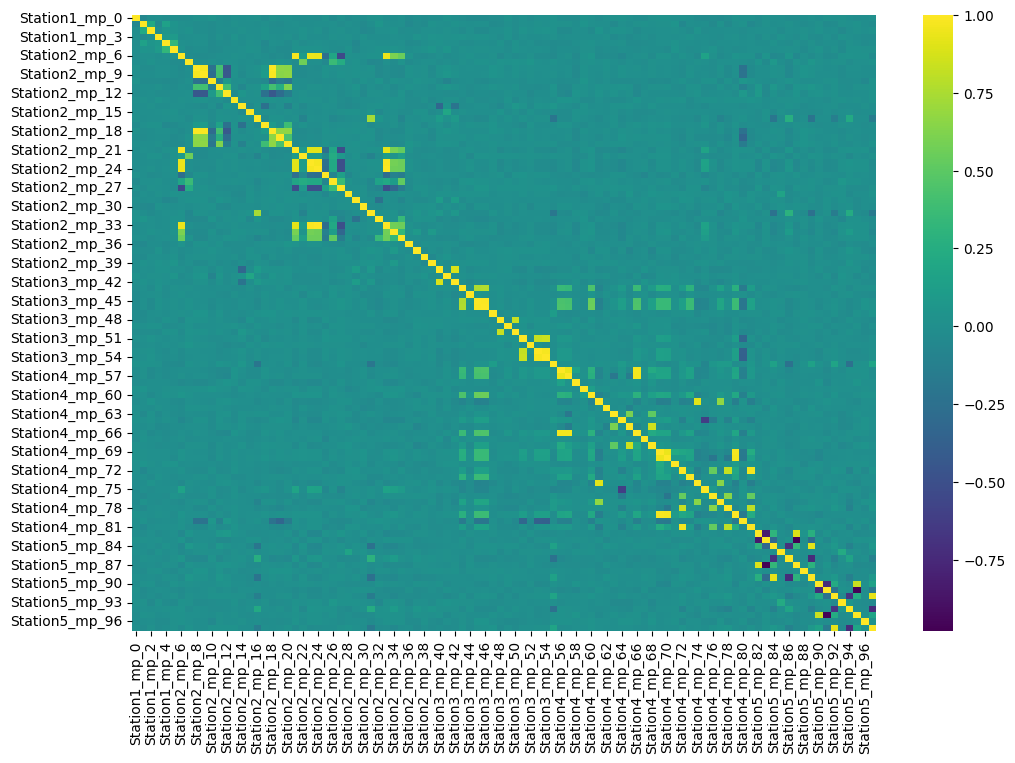

In [7]:
_ = plt.figure(figsize=(12, 8))
sns.heatmap(high.corr(), cmap="viridis")

<Axes: >

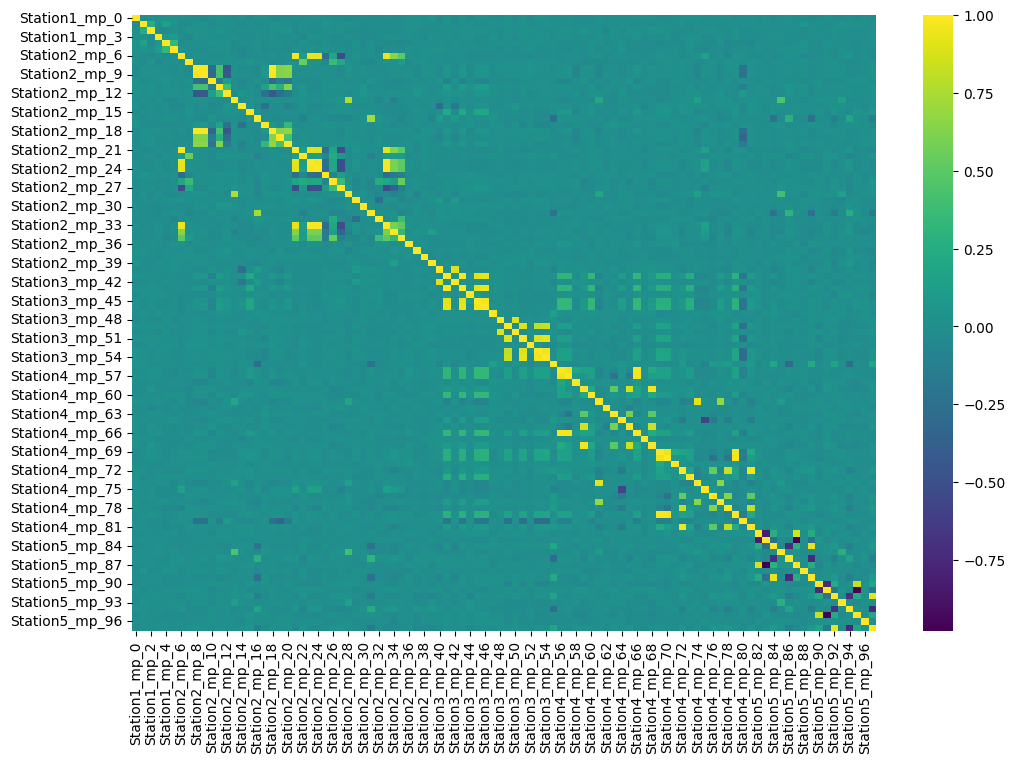

In [8]:
_ = plt.figure(figsize=(12, 8))
sns.heatmap(low.corr(), cmap="viridis")

<Axes: >

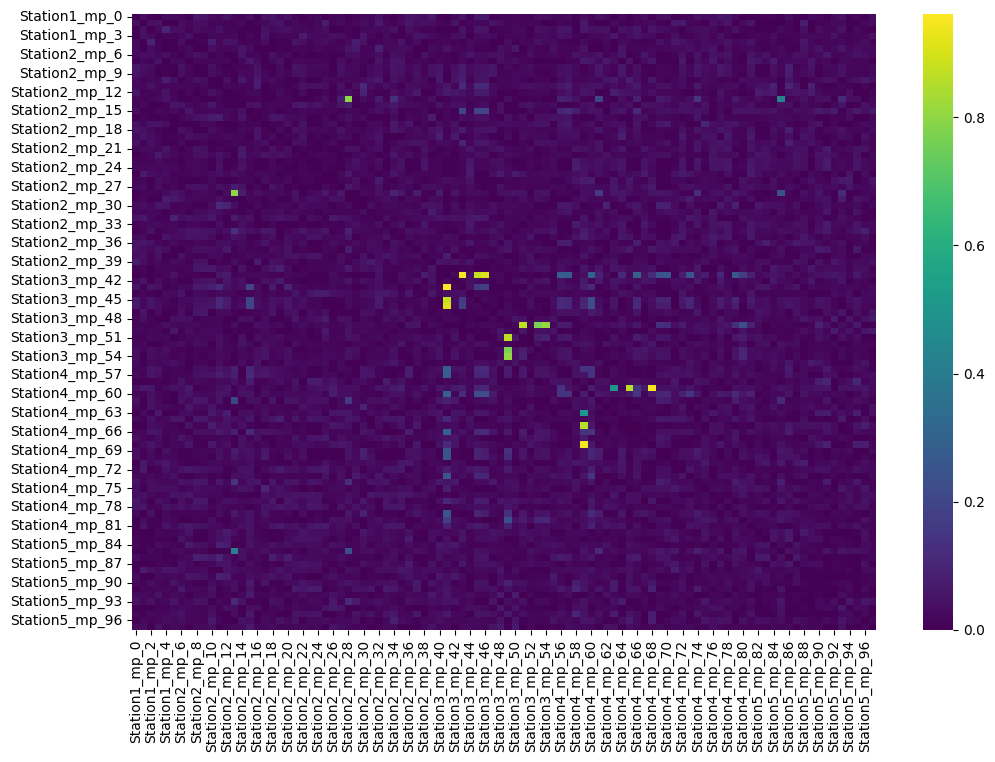

In [9]:
_ = plt.figure(figsize=(12, 8))
sns.heatmap(abs(low.corr() - high.corr()), cmap="viridis")

In [10]:
abs_diff_corr = np.triu(abs(low.corr() - high.corr()), k=1)
abs_diff_corr

array([[0.   , 0.037, 0.01 , ..., 0.015, 0.004, 0.028],
       [0.   , 0.   , 0.039, ..., 0.006, 0.019, 0.031],
       [0.   , 0.   , 0.   , ..., 0.023, 0.008, 0.001],
       ...,
       [0.   , 0.   , 0.   , ..., 0.   , 0.02 , 0.002],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.017],
       [0.   , 0.   , 0.   , ..., 0.   , 0.   , 0.   ]])

In [11]:
abs_diff_corr = np.nan_to_num(abs_diff_corr)

In [12]:
# Flatten the abs_diff_corr matrix and get the indices of the sorted values
sorted_indices = np.argsort(abs_diff_corr, axis=None)

# Get the indices of the largest values
largest_indices = np.unravel_index(sorted_indices[-10:], abs_diff_corr.shape)

print("Indices of the largest values in the abs_diff_corr matrix:", largest_indices)

Indices of the largest values in the abs_diff_corr matrix: (array([59, 49, 13, 49, 59, 49, 41, 41, 59, 41]), array([63, 53, 28, 54, 65, 51, 45, 46, 68, 43]))


In [13]:
# Get the column names associated with the largest indices
column_names = data.columns[largest_indices[1]]
print("Column names associated with the largest indices:", column_names)

Column names associated with the largest indices: Index(['Station4_mp_63', 'Station3_mp_53', 'Station2_mp_28', 'Station3_mp_54',
       'Station4_mp_65', 'Station3_mp_51', 'Station3_mp_45', 'Station3_mp_46',
       'Station4_mp_68', 'Station3_mp_43'],
      dtype='object')


In [14]:
# Create a causal model using the PC algorithm
pc = PC()
pc.learn(data.values, columns=data.columns.tolist())

In [ ]:
# Get the adjacency matrix of the learned causal graph
adj_matrix = pc.causal_matrix

# Convert the adjacency matrix to a NetworkX graph
causal_graph = nx.from_numpy_array(adj_matrix, create_using=nx.DiGraph)

# Plot the causal graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(causal_graph)
nx.draw(causal_graph, pos, with_labels=True, node_size=500, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Causal Graph')
plt.show()

# Identify the root cause of the defects
# Assuming the defect is represented by a specific column, e.g., 'defect_column'
defect_column = 'Station5_mp_85'
root_causes = [node for node in causal_graph.predecessors(data.columns.get_loc(defect_column))]

print("Root causes of the defect:", [data.columns[i] for i in root_causes])

# different models

In [86]:
low = pd.read_csv('/teamspace/studios/this_studio/dataset/low_scrap.csv')
high = pd.read_csv('/teamspace/studios/this_studio/dataset/high_scrap.csv')

In [87]:
import pandas as pd
import numpy as np
from castle.algorithms import PC, GES, Notears
from castle.metrics import MetricsDAG

In [88]:
model_before = PC()
model_after = PC()

# Fit the model on the datasets before and after quality degradation
model_before.learn(low.values)
model_after.learn(high.values)

# Extract adjacency matrices (causal graphs) for both datasets
adj_matrix_before = model_before.causal_matrix
adj_matrix_after = model_after.causal_matrix

In [99]:
for i in range(adj_matrix_before.shape[0]):
    for j in range(adj_matrix_before.shape[1]):
        if adj_matrix_before[i, j] == 1:
            from_station = int(low.columns[i].split('_')[0][-1])
            to_station = int(low.columns[j].split('_')[0][-1])
            
            if from_station > to_station:
                adj_matrix_before[i, j] = 0
            
for i in range(adj_matrix_after.shape[0]):
    for j in range(adj_matrix_after.shape[1]):
        if adj_matrix_after[i, j] == 1:
            from_station = int(low.columns[i].split('_')[0][-1])
            to_station = int(low.columns[j].split('_')[0][-1])
            
            if from_station > to_station:
                adj_matrix_after[i, j] = 0

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

def plot_graph(adj_matrix, title):
    G = nx.DiGraph(adj_matrix)
    plt.figure(figsize=(10, 7))
    nx.draw_networkx(G, with_labels=True, node_size=700, node_color="skyblue", font_size=10, arrows=True)
    plt.title(title)
    plt.show()

plot_graph(adj_matrix_before, "Causal Graph Before Quality Degradation")
plot_graph(adj_matrix_after, "Causal Graph After Quality Degradation")

In [ ]:
change_matrix = adj_matrix_after - adj_matrix_before
plot_graph(change_matrix, "Changes in Causal Relationships")

In [ ]:

# Assuming weighted_matrix_before and weighted_matrix_after are already defined
weighted_matrix_before = model_before.causal_matrix
weighted_matrix_after = model_after.causal_matrix

def plot_weighted_graph(weighted_matrix, title):
    G = nx.DiGraph(weighted_matrix)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 7))
    nx.draw_networkx(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, arrows=True)
    labels = {(i, j): f"{data['weight']:.2f}" for i, j, data in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.show()

# Plot causal graphs with weights before and after quality degradation
plot_weighted_graph(weighted_matrix_before, "Weighted Causal Graph Before Quality Degradation")
plot_weighted_graph(weighted_matrix_after, "Weighted Causal Graph After Quality Degradation")

# Another try

In [ ]:
# Load the dataset
low = pd.read_csv('dataset/low_scrap.csv')
high = pd.read_csv('dataset/high_scrap.csv')

# Standardize the data by removing the mean and dividing by the standard deviation
low_standardized = (low - low.mean()) / low.std()
high_standardized = (high - high.mean()) / high.std()
df = low_standardized - high_standardized

# Define the target parameter
defect_column = 'Station5_mp_85'

# Fit the model on the datasets before and after quality degradation
model = PC()
# model_after = Notears(max_iter=100, h_tol=1e-8, rho_max=1e+16, w_threshold=0.3)

model.learn(df.values)
# model_after.learn(high.values)

In [ ]:
# Extract adjacency matrices (causal graphs) for both datasets
adj_matrix = model.causal_matrix

non_zero_indices = np.argwhere(adj_matrix != 0)
print("Indices with non-zero values in adj_matrix_before:", non_zero_indices)

In [114]:
# for i in range(adj_matrix.shape[0]):
#     for j in range(adj_matrix.shape[1]):
#         if adj_matrix[i, j] == 1:
#             from_station = int(low.columns[i].split('_')[0][-1])
#             to_station = int(low.columns[j].split('_')[0][-1])
            
#             if from_station > to_station:
#                 adj_matrix[i, j] = 0

In [ ]:
# Convert adjacency matrices to sparse matrices
sparse_matrix = csr_matrix(adj_matrix)

# Convert sparse matrices to NetworkX graphs
causal_graph = nx.from_scipy_sparse_array(sparse_matrix, create_using=nx.DiGraph)

# Function to find root causes
def find_root_causes(causal_graph, defect_column, columns):
    defect_index = columns.get_loc(defect_column)
    root_causes = [node for node in causal_graph.predecessors(defect_index)]
    return [columns[i] for i in root_causes]

# Assuming low and high have the same columns
columns = low.columns

root_causes = find_root_causes(causal_graph, defect_column, columns)

print("Root causes of the defect before quality degradation:", root_causes)

# Function to plot weighted causal graph
def plot_weighted_graph(weighted_matrix, title):
    G = nx.DiGraph(weighted_matrix)
    pos = nx.spring_layout(G)
    plt.figure(figsize=(10, 7))
    nx.draw_networkx(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, arrows=True)
    labels = {(i, j): f"{data['weight']:.2f}" for i, j, data in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.show()

# Plot causal graphs with weights before and after quality degradation
plot_weighted_graph(adj_matrix, "Weighted Causal Graph Before Quality Degradation")

# adsada

In [4]:
from causalnex.network import BayesianNetwork
from causalnex.structure.notears import from_pandas_lasso, from_pandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from castle.algorithms import PC, Notears, DAG_GNN
import networkx as nx
import torch
import seaborn as sns
from scipy.sparse import csr_matrix

In [5]:
low = pd.read_csv('/teamspace/studios/this_studio/dataset/low_scrap.csv')
high = pd.read_csv('/teamspace/studios/this_studio/dataset/high_scrap.csv')

# Combine the datasets for causal analysis

low_standardized = (low - low.mean()) / low.std()
high_standardized = (high - high.mean()) / high.std()

# low_standardized["group"] = 0  # Label low scrap as 0
# high_standardized["group"] = 1  # Label low scrap as 1

data = pd.concat([low, high]).reset_index(drop=True)

# data.rename({"index": "timepoint"}, axis=1, inplace=True)

data

,Station1_mp_0,Station1_mp_1,Station1_mp_2,Station1_mp_3,Station1_mp_4,Station1_mp_5,Station2_mp_6,Station2_mp_7,Station2_mp_8,Station2_mp_9,...,Station5_mp_88,Station5_mp_89,Station5_mp_90,Station5_mp_91,Station5_mp_92,Station5_mp_93,Station5_mp_94,Station5_mp_95,Station5_mp_96,Station5_mp_97
0,0.000164,10.0,2.0,0.000224,15.0,3.0,37577.464524,0.003730,55728.48,38647.52,...,4.610773e+06,0.004900,11161.72,5580.859,0.005311,378.1243,0.000600,5482.792737,4.217334e+06,0.004869
1,0.000240,8.0,2.0,0.000219,17.0,4.0,38731.386253,0.003738,56068.79,38993.59,...,4.308434e+06,0.004918,11161.72,6042.939,0.005281,393.5057,0.000627,5095.717933,4.039557e+06,0.004842
2,0.000160,11.0,3.0,0.000189,14.0,4.0,39404.300798,0.003647,56295.66,39024.36,...,4.320958e+06,0.004795,10838.07,6490.280,0.005289,390.3012,0.000576,4195.970586,4.177828e+06,0.004766
3,0.000173,9.0,3.0,0.000219,17.0,4.0,37393.410715,0.003700,54588.34,37205.51,...,4.625802e+06,0.004947,11013.67,5999.359,0.005361,389.0194,0.000551,4962.535809,4.194777e+06,0.004873
4,0.000212,9.0,2.0,0.000205,13.0,4.0,39265.722068,0.003616,55140.14,37751.55,...,4.569075e+06,0.004930,11148.90,5907.712,0.005314,351.2070,0.000574,5205.339077,4.015814e+06,0.004855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000192,9.0,2.0,0.000191,17.0,4.0,36978.079747,0.003614,57555.01,40074.13,...,4.171952e+06,0.004855,11150.18,5434.736,0.005389,388.3785,0.000600,5717.655904,4.063428e+06,0.004826
4996,0.000233,10.0,2.0,0.000202,12.0,4.0,36876.816011,0.003654,58493.27,41112.37,...,4.726517e+06,0.004887,11219.40,5958.983,0.005166,394.1465,0.000797,5288.176644,4.415160e+06,0.004650
4997,0.000147,8.0,3.0,0.000203,14.0,4.0,38685.399380,0.003664,55770.78,38576.38,...,4.472888e+06,0.004887,11178.38,6185.858,0.005400,385.8150,0.000574,4957.477832,4.653393e+06,0.004945
4998,0.000148,9.0,3.0,0.000246,17.0,5.0,37528.055062,0.003636,54790.22,37786.16,...,4.334952e+06,0.004885,11006.62,6251.229,0.005373,392.8648,0.000531,4916.920534,4.470916e+06,0.004916


In [6]:
# # Extract data as numpy array
# X = data

# # Initialize PC algorithm
# pc = DAG_GNN(device_type="gpu", k_max_iter=5)

# # Learn causal graph
# pc.learn(data.values)

In [7]:
# from scipy.stats import mannwhitneyu

# U1, p = mannwhitneyu(high_standardized, low_standardized, alternative="greater", method="asymptotic")

In [8]:
# len(p)

In [9]:
# p

In [10]:
# stat_test_df = high_standardized.iloc[:, np.argwhere(p <= 0.05).flatten()]
# stat_test_df

In [11]:
# stat_test_df.columns

In [12]:
# oli_adj = np.load('oli/adjacency_matrix.npy')
# oli_adj.shape

In [13]:
# high.columns

In [14]:
# adj_df = pd.DataFrame(oli_adj, columns=low.columns, index=low.columns)
# adj_df.loc["Station5_mp_85", list(stat_test_df.columns)]

In [15]:
import pickle

with open("/teamspace/studios/this_studio/misc/causal_model.pkl", "rb") as file:
    sm = pickle.load(file)

In [16]:
data

,Station1_mp_0,Station1_mp_1,Station1_mp_2,Station1_mp_3,Station1_mp_4,Station1_mp_5,Station2_mp_6,Station2_mp_7,Station2_mp_8,Station2_mp_9,...,Station5_mp_88,Station5_mp_89,Station5_mp_90,Station5_mp_91,Station5_mp_92,Station5_mp_93,Station5_mp_94,Station5_mp_95,Station5_mp_96,Station5_mp_97
0,0.000164,10.0,2.0,0.000224,15.0,3.0,37577.464524,0.003730,55728.48,38647.52,...,4.610773e+06,0.004900,11161.72,5580.859,0.005311,378.1243,0.000600,5482.792737,4.217334e+06,0.004869
1,0.000240,8.0,2.0,0.000219,17.0,4.0,38731.386253,0.003738,56068.79,38993.59,...,4.308434e+06,0.004918,11161.72,6042.939,0.005281,393.5057,0.000627,5095.717933,4.039557e+06,0.004842
2,0.000160,11.0,3.0,0.000189,14.0,4.0,39404.300798,0.003647,56295.66,39024.36,...,4.320958e+06,0.004795,10838.07,6490.280,0.005289,390.3012,0.000576,4195.970586,4.177828e+06,0.004766
3,0.000173,9.0,3.0,0.000219,17.0,4.0,37393.410715,0.003700,54588.34,37205.51,...,4.625802e+06,0.004947,11013.67,5999.359,0.005361,389.0194,0.000551,4962.535809,4.194777e+06,0.004873
4,0.000212,9.0,2.0,0.000205,13.0,4.0,39265.722068,0.003616,55140.14,37751.55,...,4.569075e+06,0.004930,11148.90,5907.712,0.005314,351.2070,0.000574,5205.339077,4.015814e+06,0.004855
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.000192,9.0,2.0,0.000191,17.0,4.0,36978.079747,0.003614,57555.01,40074.13,...,4.171952e+06,0.004855,11150.18,5434.736,0.005389,388.3785,0.000600,5717.655904,4.063428e+06,0.004826
4996,0.000233,10.0,2.0,0.000202,12.0,4.0,36876.816011,0.003654,58493.27,41112.37,...,4.726517e+06,0.004887,11219.40,5958.983,0.005166,394.1465,0.000797,5288.176644,4.415160e+06,0.004650
4997,0.000147,8.0,3.0,0.000203,14.0,4.0,38685.399380,0.003664,55770.78,38576.38,...,4.472888e+06,0.004887,11178.38,6185.858,0.005400,385.8150,0.000574,4957.477832,4.653393e+06,0.004945
4998,0.000148,9.0,3.0,0.000246,17.0,5.0,37528.055062,0.003636,54790.22,37786.16,...,4.334952e+06,0.004885,11006.62,6251.229,0.005373,392.8648,0.000531,4916.920534,4.470916e+06,0.004916


In [17]:
sm

In [18]:
sm_dag

NameError: name 'sm_dag' is not defined

In [20]:
# adj_matrix = np.load('/teamspace/studios/this_studio/adjacency_matrix.npy')
# adj_matrix

array([[0., 1., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Root causes of the defect before quality degradation: ['Station2_mp_13', 'Station2_mp_28']


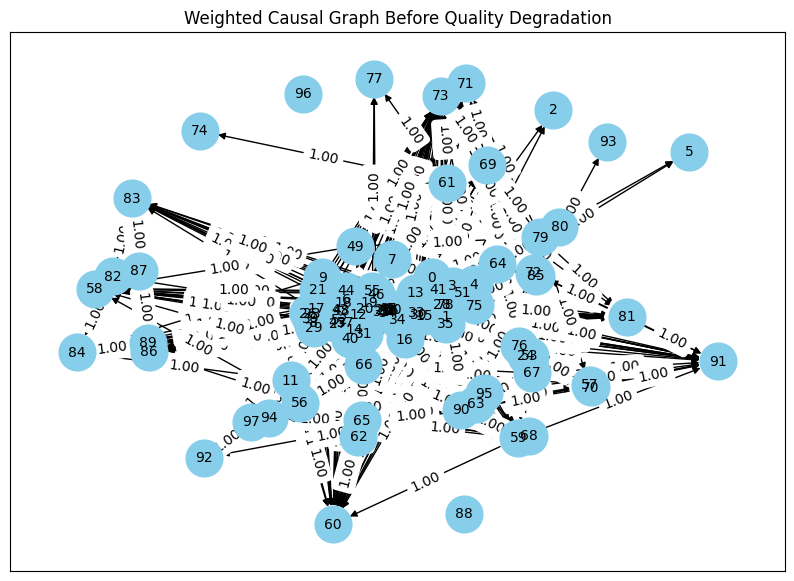

In [22]:
# # Convert adjacency matrices to sparse matrices
# sparse_matrix = csr_matrix(adj_matrix)

# # Convert sparse matrices to NetworkX graphs
# causal_graph = nx.from_scipy_sparse_array(sparse_matrix, create_using=nx.DiGraph)

# # Function to find root causes
# def find_root_causes(causal_graph, defect_column, columns):
#     defect_index = columns.get_loc(defect_column)
#     root_causes = [node for node in causal_graph.predecessors(defect_index)]
#     return [columns[i] for i in root_causes]

# # Assuming low and high have the same columns
# columns = low.columns

# root_causes = find_root_causes(causal_graph, "Station5_mp_85", columns)

# print("Root causes of the defect before quality degradation:", root_causes)

# # Function to plot weighted causal graph
# def plot_weighted_graph(weighted_matrix, title):
#     G = nx.DiGraph(weighted_matrix)
#     pos = nx.spring_layout(G)
#     plt.figure(figsize=(10, 7))
#     nx.draw_networkx(G, pos, with_labels=True, node_size=700, node_color="skyblue", font_size=10, arrows=True)
#     labels = {(i, j): f"{data['weight']:.2f}" for i, j, data in G.edges(data=True)}
#     nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
#     plt.title(title)
#     plt.show()

# plot_weighted_graph(adj_matrix, "Weighted Causal Graph Before Quality Degradation")

In [25]:
# Relabel nodes with variable names
mapping = {i: col for i, col in enumerate(data.columns)}
causal_graph = nx.relabel_nodes(causal_graph, mapping)

In [27]:
# Ensure the graph is acyclic
sm_dag = nx.DiGraph([(u, v) for u, v in nx.edge_dfs(sm) if not nx.has_path(sm, v, u)])

# Identify connected components
components = list(nx.weakly_connected_components(sm_dag))

# Select the largest connected component
largest_component = max(components, key=len)
sm_largest_dag = sm_dag.subgraph(largest_component).copy()

# Create Bayesian Network with the largest connected component
bn = BayesianNetwork(sm_dag)
bn = bn.fit_node_states(data)

In [28]:
# Fit the Bayesian Network with the observed data
bn = bn.fit_cpds(data)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/causalnex/network/network.py:379: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].map(self._node_states[col])
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/pgmpy/factors/discrete/CPD.py:332: RuntimeWarning: invalid value encountered in divide
  tabular_cpd.values = (cpd / cpd.sum(axis=0)).reshape(tabular_cpd.cardinality)


: 

In [ ]:
# Get CPDs for all nodes
cpds = bn.cpds
cpds

In [ ]:
# Create a dictionary to hold the edge weights (conditional probabilities)
edge_weights = []

# Iterate through edges and associate them with the relevant CPDs
for u, v in bn.edges:
    cpd_v = next((cpd for cpd in cpds if cpd.variable == v), None)  # Find CPD for the target node
    edge_weights.append((u, v, cpd_v))

# Print edges with learned weights
print("Edges with learned weights:")
for u, v, cpd in edge_weights:
    print(f"Edge: {u} -> {v}, CPD: {cpd}")


_ = plt.figure(figsize=(40,40))
# Optionally visualize the Bayesian Network
pos = nx.spring_layout(sm_dag)
nx.draw(sm_dag, pos, with_labels=True)
edge_labels = {(u, v): f"{v} CPD" for u, v in bn.edges}  # This is just a placeholder for visualization
nx.draw_networkx_edge_labels(sm_dag, pos, edge_labels=edge_labels)
# Highlight the target variable
nx.draw_networkx_nodes(sm_dag, pos, nodelist=['Station5_mp_85'], node_color='red', node_size=300)
plt.show()

In [47]:
# # Get the adjacency matrix
# adjacency_matrix = pc.causal_matrix

# # Convert adjacency matrix to NetworkX graph
# G = nx.DiGraph(adjacency_matrix)

# # Relabel nodes with variable names
# mapping = {i: col for i, col in enumerate(data.columns)}
# G = nx.relabel_nodes(G, mapping)

In [ ]:
# # Calculate mean differences between the two datasets
# # mean_diff = (high_standardized.drop("group", axis=1) - low_standardized.drop("group", axis=1)).mean()
# mean_diff = (high_standardized - low_standardized).mean()

# # Focus on variables with the largest mean differences
# mean_diff = mean_diff.abs().sort_values(ascending=False)

# print(f"number of nodes participating in the difference: {len(np.argwhere(mean_diff <= 0.05))}")
# # Select top variables that changed the most
# top_changes = mean_diff.index[:3]

# print("Variables with the largest changes:")
# print(mean_diff[top_changes])

In [ ]:
# # Plot the causal graph
# plt.figure(figsize=(40, 40))
# pos = nx.spring_layout(G, seed=42, threshold = 0.05)

# # Draw nodes
# nx.draw_networkx_nodes(G, pos, node_size=300)

# # Draw edges with directions
# nx.draw_networkx_edges(G, pos, arrows=True, arrowsize=30)

# # Draw node labels
# nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# # Highlight the target variable
# nx.draw_networkx_nodes(G, pos, nodelist=['Station5_mp_85'], node_color='red', node_size=300)

# # Highlight root cause variables
# root_causes = top_changes.tolist()
# nx.draw_networkx_nodes(G, pos, nodelist=root_causes, node_color='green', node_size=300)

# plt.title("Causal Graph with Root Causes Highlighted")
# plt.axis('off')
# plt.show()

In [18]:
np.savetxt("adj_0.txt",np.zeros((98,98)))